# --------------- Logistic Regression Using Sklearn -------------------

### Importing Libraries

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [146]:
data = pd.read_csv("https://raw.githubusercontent.com/sahdevsaini/Data-Set/main/Written_Tests.csv")

In [147]:
data.head()

,Test 1,Test 2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Dividing feature into independent and dependent feature 

In [148]:
X = data[['Test 1', 'Test 2']].values     # Independent Feature 
y = data['Results'].values               # Dependent Feature

### Visualize the Data
---

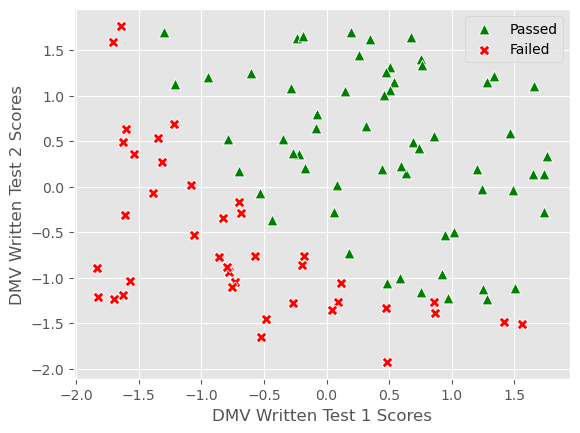

In [149]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Passed", "Failed"])
plt.show();

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

#### find mean & Standard devation of features values

In [151]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [152]:
regression

LogisticRegression()

In [153]:
logistic_regessor = regression.fit(X,y)

In [154]:
coefficients = logistic_regessor.coef_
coefficients

array([[0.20535491, 0.2005838 ]])

In [155]:
intercept = logistic_regessor.intercept_
intercept

array([-25.05219314])

In [156]:
y_predicted = logistic_regessor.predict(X_test)

In [157]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

#### logistic regression function

In [158]:
# Assuming you have obtained the coefficients theta
beta_0 = round(intercept[0],3)
beta_1 = round(coefficients[0,0],2)
beta_2 = round(coefficients[0,1],2)

print(f"Logistic Regression Function: P(y=1|x) = 1 / (1 + exp(-({beta_0} + {beta_1}*Test1 + {beta_2}*Test2)))")


Logistic Regression Function: P(y=1|x) = 1 / (1 + exp(-(-25.052 + 0.21*Test1 + 0.2*Test2)))


## $$ \sigma(z) = \frac{1}{1+e^{-({-25.05219} + {0.2053549}*Test1 + {0.2005838039}*Test2))}}$$

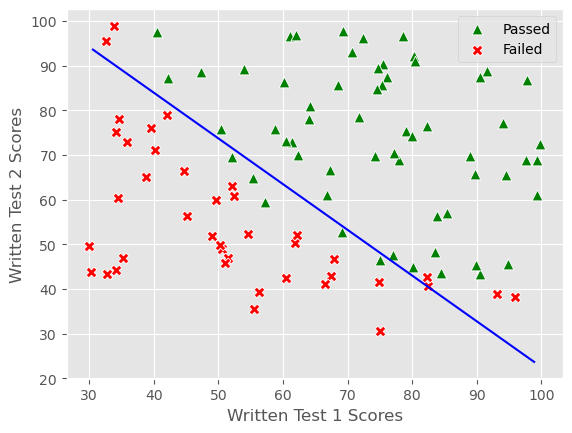

In [159]:
sns.scatterplot(x = X[passed[:, 0], 0],
                y = X[passed[:, 0], 1],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 0],
                    y = X[failed[:, 0], 1],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["Passed", "Failed"])
ax.set(xlabel="Written Test 1 Scores", ylabel="Written Test 2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(intercept[0] + coefficients[0,0] * x_boundary) / coefficients[0,1]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

In [160]:
df.corr()

,Actual Data,Predicted Data
Actual Data,1.000000,0.697518
Predicted Data,0.697518,1.000000


In [161]:
df = pd.DataFrame({"Actual Data":y_test,
                    "Predicted Data" :y_predicted 
})
df

,Actual Data,Predicted Data
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,1
9,0,0


In [162]:
from sklearn.metrics import accuracy_score

# Assuming y_test contains the true labels and y_predicted contains the predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predicted)

print("Accuracy of the Model:- ", accuracy*100,"%")


Accuracy of the Model:-  85.0 %


In [163]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

#### Confusion matrix

In [164]:
cm = confusion_matrix(y_test,y_predicted)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 7  1]
 [ 2 10]]


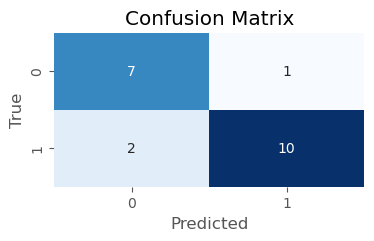

In [165]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Plot confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### Precision-recall curve

In [166]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)
print("Precision-Recall Curve:\n", precision, recall, thresholds)

Precision-Recall Curve:
 [0.6        0.90909091 1.        ] [1.         0.83333333 0.        ] [0 1]


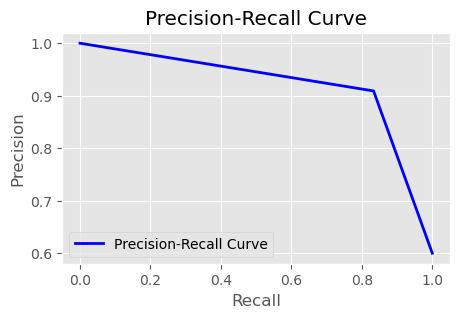

F1 Score: 0.8695652173913043


In [172]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Compute F1 score
f1 = f1_score(y_test, y_predicted)

# Plot Precision-Recall curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Print F1 score
print("F1 Score:", f1)


#### ROC AUC score

In [167]:
roc_auc = roc_auc_score(y_test, y_predicted)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8541666666666667


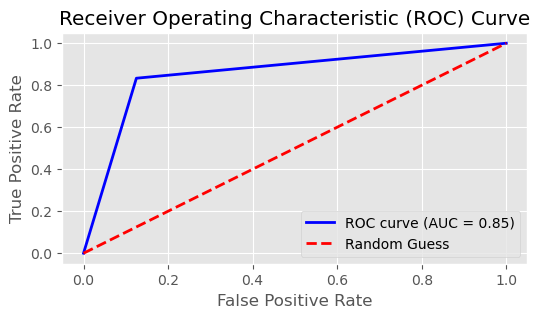

In [173]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_predicted)

# Plot ROC curve
plt.figure(figsize=(6, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### F1 score

In [137]:
f1 = f1_score(y_test, y_predicted, average='micro')
print("F1 Score:", f1)

F1 Score: 0.85
